## Download testing data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glacierpoly as gpoly
import glob
import matplotlib.pyplot as plt

In [3]:
import cv2
import glob
import geopandas as gpd
import img2pdf
import numpy as np
import os
import pandas as pd
from pathlib import Path
import rasterio
from rasterio import mask
from rasterstats import zonal_stats
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import polygonize
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
import subprocess
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [4]:
reference_dem_file = '/mnt/Backups/knuth/paper/south_cascade/final_products/scg_test_data/reference_dem.tif'
reference_glacier_polygon_file = '/mnt/Backups/knuth/paper/south_cascade/final_products/scg_test_data/rgi_glacier_oultine.geojson'
difference_maps_files = sorted(glob.glob('/mnt/Backups/knuth/paper/south_cascade/final_products/scg_test_data/dod*.tif'))
ortho_files = sorted(glob.glob('/mnt/Backups/knuth/paper/south_cascade/final_products/scg_test_data/ortho*.tif'))

In [5]:
gpoly.core.run_detection(reference_dem_file,
                  difference_maps_files,
                  reference_glacier_polygon_file,
                     ortho_files,    
                  output_directory = 'outputs')

processing dod_1967-09-21
detected polygon does not intersect reference polygon
reattempting detection without eroding islands
SUCCESS

processing dod_1970-09-29
SUCCESS

processing dod_1974-08-10
SUCCESS

processing dod_1977-10-03
SUCCESS

processing dod_1979-08-20
SUCCESS

processing dod_1979-10-06
detected polygon does not intersect reference polygon
reattempting detection without eroding islands
SUCCESS

processing dod_1984-08-14
SUCCESS

processing dod_1986-09-05
SUCCESS

processing dod_1987-08-21
SUCCESS

processing dod_1990-09-05
SUCCESS

processing dod_1991-09-09
SUCCESS

processing dod_1992-07-28
SUCCESS

processing dod_1992-09-15
SUCCESS

processing dod_1992-09-18
SUCCESS

processing dod_1992-10-06
SUCCESS

processing dod_1994-09-06
SUCCESS

processing dod_1996-09-10
SUCCESS

processing dod_1997-09-23
SUCCESS



In [171]:
detected_polygon_file = 'outputs/glacier_outline_full_1967-09-21.geojson'

In [191]:
merged = gpoly.core.merge_with_undetected_high_elevation_areas(reference_dem_file,
    reference_glacier_polygon_file,
    detected_polygon_file,
)

In [192]:
tmp = gpd.GeoDataFrame(geometry=merged.buffer(1)).dissolve().explode().reset_index().iloc[: , 2:]
tmp = tmp[tmp.area == tmp.area.max()]
input_l = tmp.geometry.exterior.reset_index(drop=True).iloc[0]


In [193]:
merged = merged.geometry.append(gpd.GeoSeries([Polygon(input_l.coords)]))
merged = gpd.GeoDataFrame(geometry=merged).dissolve()

In [199]:
merged = merged.explode().reset_index().iloc[:, 2:]
geoms = []
for i in range(0, len(merged)):
    geoms.append(Polygon(merged["geometry"].iloc[i].exterior))
merged["geometry"] = geoms
merged = merged.dissolve()

In [200]:
merged.explode().area

0  0     1.493255e+01
   1     5.692599e+01
   2     2.213654e-01
   3     4.174673e-01
   4     1.300188e+04
   5     9.068026e-01
   6     2.262430e+02
   7     6.542470e-02
   8     7.539180e+00
   9     2.796443e+06
   10    6.202677e-01
   11    1.777066e+01
   12    4.104951e+00
   13    2.610191e+01
   14    7.659037e+00
   15    1.753815e+01
   16    2.570055e+01
   17    3.476477e-01
   18    2.700833e-03
   19    1.367944e+01
dtype: float64

In [197]:
merged.explode().area

0  0     1.493255e+01
   1     5.692599e+01
   2     2.213654e-01
   3     4.174673e-01
   4     1.300188e+04
   5     9.068026e-01
   6     2.262430e+02
   7     6.542470e-02
   8     7.539180e+00
   9     2.796443e+06
   10    6.202677e-01
   11    1.777066e+01
   12    4.104951e+00
   13    2.610191e+01
   14    7.659037e+00
   15    1.753815e+01
   16    2.570055e+01
   17    3.476477e-01
   18    2.700833e-03
   19    1.367944e+01
dtype: float64

In [201]:
! rm -rf outputs/

'2.42'

In [15]:
# difference_maps_files = [difference_maps_files[1],]

In [206]:
gdf = gpd.read_file('outputs/glacier_outline_detected_1974-08-10.geojson')

In [155]:
a = gpd.GeoDataFrame(geometry=gdf.buffer(1)).dissolve().explode().reset_index().iloc[: , 2:]

In [156]:
tmp = a[a.area == a.area.max()]

In [158]:
input_l = tmp.geometry.exterior.reset_index(drop=True).iloc[0]

In [159]:
gdf = gdf.geometry.append(gpd.GeoSeries([Polygon(input_l.coords)]))

In [187]:
gdf

0    MULTIPOLYGON (((643553.171 5357499.114, 643553...
0    POLYGON ((643195.286 5357974.055, 643195.301 5...
dtype: geometry

In [123]:
# input_p

In [115]:
input_l = a[a.index == 2].geometry.exterior.reset_index(drop=True).iloc[0]

In [140]:
gdf = gdf.geometry.append(gpd.GeoSeries([Polygon(input_l.coords)]))

<AxesSubplot:>

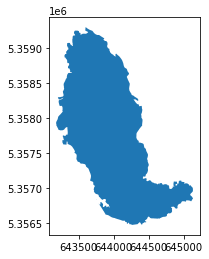

In [144]:
gpd.GeoDataFrame(geometry=gdf).dissolve().plot()

In [117]:
unioned = input_p.boundary.union(input_l)

In [118]:
keep_polys = [poly for poly in polygonize(unioned) if poly.representative_point().within(input_p)]

In [127]:
test = gpd.GeoDataFrame(geometry=[MultiPolygon(keep_polys)]).dissolve().explode().reset_index().iloc[: , 2:]

In [130]:
test.area

0    1.195443e+00
1    2.048697e-01
2    1.572794e-01
3    1.685742e+01
4    4.451542e-01
5    7.239857e-01
6    2.415725e+06
dtype: float64

outputs/glacier_outline_detected_1967-09-21.geojson
outputs/glacier_outline_detected_1970-09-29.geojson
outputs/glacier_outline_detected_1974-08-10.geojson
outputs/glacier_outline_detected_1977-10-03.geojson
outputs/glacier_outline_detected_1979-08-20.geojson
outputs/glacier_outline_detected_1979-10-06.geojson
outputs/glacier_outline_detected_1984-08-14.geojson
outputs/glacier_outline_detected_1986-09-05.geojson
outputs/glacier_outline_detected_1987-08-21.geojson
outputs/glacier_outline_detected_1990-09-05.geojson
outputs/glacier_outline_detected_1991-09-09.geojson
outputs/glacier_outline_detected_1992-07-28.geojson
outputs/glacier_outline_detected_1992-09-15.geojson
outputs/glacier_outline_detected_1992-09-18.geojson
outputs/glacier_outline_detected_1992-10-06.geojson
outputs/glacier_outline_detected_1994-09-06.geojson
outputs/glacier_outline_detected_1996-09-10.geojson
outputs/glacier_outline_detected_1997-09-23.geojson
outputs/glacier_outline_full_1967-09-21.geojson
outputs/glacier_

processing dod_1967-09-21
detected polygon does not intersect reference polygon
reattempting detection without eroding islands
SUCCESS

processing dod_1970-09-29
SUCCESS

processing dod_1974-08-10
SUCCESS

processing dod_1977-10-03
SUCCESS

processing dod_1979-08-20
SUCCESS

processing dod_1979-10-06
detected polygon does not intersect reference polygon
reattempting detection without eroding islands
SUCCESS

processing dod_1984-08-14
SUCCESS

processing dod_1986-09-05
SUCCESS

processing dod_1987-08-21
SUCCESS

processing dod_1990-09-05
SUCCESS

processing dod_1991-09-09
SUCCESS

processing dod_1992-07-28
SUCCESS

processing dod_1992-09-15
SUCCESS

processing dod_1992-09-18
SUCCESS

processing dod_1992-10-06
SUCCESS

processing dod_1994-09-06
SUCCESS

processing dod_1996-09-10
SUCCESS

processing dod_1997-09-23
SUCCESS



In [12]:
! rm -rf outputs

In [8]:
difference_map_file = difference_maps_files[0]
output_directory = 'outputs'

In [9]:
file_name = str(Path(difference_map_file).stem)
print("processing", file_name)

transform, res, crs = gpoly.core.get_raster_metadata(difference_map_file)
array = gpoly.core.clip_raster_by_buffer(
    difference_map_file, reference_glacier_polygon_file, buffer_distance=2000
)

processing dod_1970-09-29


In [10]:
arrays = gpoly.core.detect_glacier(array, erode_islands=False)

In [11]:
detected_array = arrays[-1]
detected_polygon_gdf = gpoly.core.convert_glacier_array_to_gdf(
    detected_array, transform, res, crs
)

In [12]:
detected_polygon_gdf = gpoly.core.find_largest_intersecting_detected_polygon(
    reference_glacier_polygon_file, detected_polygon_gdf
)

In [13]:
detected_polygon_gdf = gpoly.core.clip_area_beyond_previous_glacier_boundary(
    reference_glacier_polygon_file, detected_polygon_gdf
)


In [14]:
detected_polygon_file = gpoly.core.save_polygon_gdf_to_geojson(
    detected_polygon_gdf,
    output_directory,
    "glacier_outline_detected_" + file_name.split("_")[-1],
)

In [15]:
merged = gpoly.core.merge_with_undetected_high_elevation_areas(
    reference_dem_file,
    reference_glacier_polygon_file,
    detected_polygon_file,
)

In [16]:
merged_polygon_file =             gpoly.core.save_polygon_gdf_to_geojson(
                merged,
                output_directory,
                "glacier_outline_full_" + file_name.split("_")[-1],
            )

In [90]:
gpoly.plotting.plot_dod_with_polygons(ortho_files[1],
                           reference_glacier_polygon_file,
                           merged_polygon_file,
                           output_directory,
                                      suffix='test',
                           cmap='Greys')

181.0 242.0


In [53]:
source = rasterio.open(ortho_files[1])

In [81]:
merged.geometry.area[0]

2663958.5313404347

In [83]:
a = ['a','b']

In [84]:
if a :
    print('yes')

yes


In [67]:
array = gpoly.core.replace_and_fill_nodata_value(array, source.nodata, np.nan)

In [69]:
np.nanpercentile(array,[5,95])

array([181., 242.])

In [18]:
gpoly.plotting.plot_dod_with_polygons(difference_map_file,
                           reference_glacier_polygon_file,
                           merged_polygon_file,
                           output_directory,
                           cmap='RdBu',
                           vmin=-10,
                           vmax=10)

In [137]:
from rasterio.plot import show
import cartopy

In [183]:
def plot_dod_with_polygons(difference_map_file,
                           reference_glacier_polygon_file,
                           merged_polygon_file,
                           cmap=None,
                           vmin = None,
                           vmax = None,
                           cbar_fraction=0.035):
    
    source = rasterio.open(difference_map_file)

    fig, ax = plt.subplots(figsize=(10, 10))

    sm = ax.imshow(source.read(1), cmap=cmap, vmin=vmin, vmax=vmax,alpha=0.5)

    crs = cartopy.crs.epsg(source.crs.to_epsg())

    ax = plt.axes(projection=crs)

    show(source, cmap=cmap, ax=ax, interpolation="none", vmin=vmin, vmax=vmax,alpha=0.5)

    cb = fig.colorbar(sm, 
                 ax=ax, 
                 fraction=cbar_fraction, 
                 pad=0.001, 
                 extend="both", 
                 aspect=50)
    cb.set_label(label='Elevation difference [m]', size=15)
    cb.ax.tick_params(labelsize=12) 
    
    reference_glacier_polygon = gpd.read_file(reference_glacier_polygon_file)
    merged_polygon = gpd.read_file(merged_polygon_file)

    reference_glacier_polygon.plot(ax=ax, facecolor="none", edgecolor="b")
    merged_polygon.plot(ax=ax, facecolor="none", edgecolor="g")
    
    labels = ['RGI', 'Detected']
    patches = [Line2D([0], [0], color='b',label=labels[0]),
               Line2D([0], [0], color='g',label=labels[1])]
    ax.legend(handles=patches)

TypeError: plot_dod_with_polygons() missing 1 required positional argument: 'output_directory'

In [116]:
# def plot_dod_with_polygons(difference_map_file,
#                            reference_glacier_polygon_file,
#                            detected_polygon_file,
#                            merged_polygon_file,
#                            cmap=None,
#                            vmin = None,
#                            vmax = None,
#                            cbar_fraction=0.035):
    
#     polygon_files = [reference_glacier_polygon_file,
#                      detected_polygon_file,
#                      merged_polygon_file]
#     polygons = [gpd.read_file(x) for x in polygon_files]
#     labels = ['rgi', 'detected', 'fill from rgi and detected']
    
#     source = rasterio.open(difference_map_file)
#     crs = cartopy.crs.epsg(source.crs.to_epsg())
    
#     fig, axes = plt.subplots(1,3,figsize=(15,5), subplot_kw={'projection': crs})
    
#     ax = axes[2]
#     cbar_ax = fig.add_axes(ax.get_position())
#     sm = cbar_ax.imshow(source.read(1), cmap=cmap, vmin=vmin, vmax=vmax)
#     cbar_ax.set_xticks(())
#     cbar_ax.set_yticks(())
#     cbar_ax.set_visible(False)
#     fig.colorbar(sm, ax=ax, fraction=cbar_fraction, pad=0.001, extend="both", aspect=50, label='Elevation difference [m]')
    
#     labels = ['fill from rgi', 'detected']
#     patches = [Patch(facecolor='C0',label=labels[0]),
#                Patch(facecolor='r',label=labels[1])]
#     ax.legend(handles=patches)
    
#     for i, ax in enumerate(axes):
#         ax.set_xticks(())
#         ax.set_yticks(())
#         show(source,ax=ax, cmap = cmap, vmin = vmin, vmax = vmax)
        
#     polygons[0].plot(ax = axes[0])
#     polygons[1].plot(ax = axes[1])
#     polygons[2].plot(ax = axes[2])
#     plt.tight_layout()

In [117]:
# plot_dod_with_polygons(difference_map_file,
#                        reference_glacier_polygon_file,
#                        detected_polygon_file,
#                        merged_polygon_file,
#                       cmap='RdBu',
#                       vmin=-10,
#                       vmax=10)

In [ ]:
# call = [
#     gdaladdo --config COMPRESS_OVERVIEW LZW --config INTERLEAVE_OVERVIEW PIXEL --config BIGTIFF_OVERVIEW IF_SAFER -ro $1 2 4 8 16 32 64
# ]